In [67]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [68]:
dataset = pd.read_csv("dataset.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [69]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],
                                                    dataset.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4213 non-null   int64  
 1   Name               4213 non-null   object 
 2   Location           4213 non-null   object 
 3   Year               4213 non-null   int64  
 4   Kilometers_Driven  4213 non-null   int64  
 5   Fuel_Type          4213 non-null   object 
 6   Transmission       4213 non-null   object 
 7   Owner_Type         4213 non-null   object 
 8   Mileage            4212 non-null   object 
 9   Engine             4189 non-null   object 
 10  Power              4189 non-null   object 
 11  Seats              4185 non-null   float64
 12  New_Price          580 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 460.8+ KB


In [71]:
np.shape(X_train)

(4213, 13)

In [72]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [73]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                35
Maruti Swift VDI                      31
Maruti Ritz VDi                       26
Hyundai i10 Sportz                    25
Maruti Swift Dzire VDI                24
                                      ..
Skoda Laura L and K AT                 1
Honda Amaze S Diesel                   1
Nissan Micra XE                        1
Renault KWID Climber 1.0 MT            1
Ford Endeavour 2.2 Titanium AT 4X2     1
Name: Name, Length: 1592, dtype: int64

In [74]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [75]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

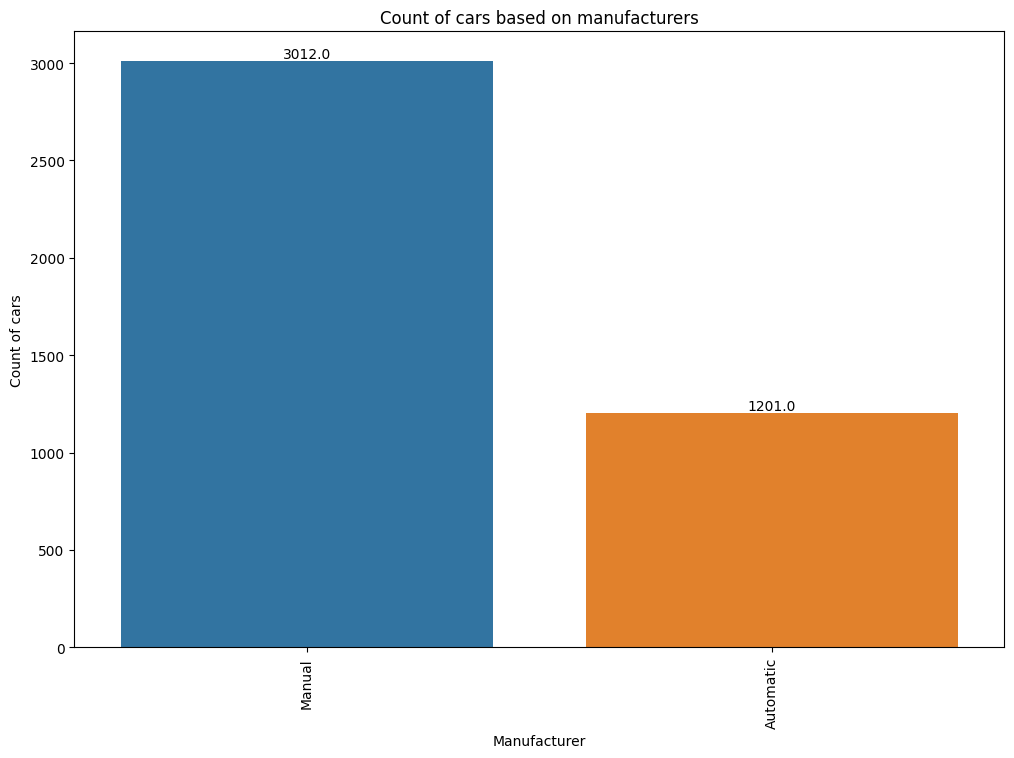

In [76]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Transmission', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [77]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

In [78]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [79]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [80]:
X_train["Kilometers_Driven"]

4201     77000
4383     19947
1779     70963
4020    115195
3248     58752
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4213, dtype: int64

In [81]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [82]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


In [83]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [84]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [85]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
column_names = X_train.columns
print(X_train)

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
4201    13              77000    Diesel       Manual      First    22.07   
4383     8              19947    Petrol       Manual      First    20.36   
1779    10              70963    Diesel       Manual      First    15.10   
4020    11             115195    Diesel       Manual      First    25.20   
3248    13              58752    Petrol       Manual      First    16.47   
...    ...                ...       ...          ...        ...      ...   
3772     9              27000    Petrol    Automatic      First    17.97   
5191     5               9000    Diesel    Automatic      First    12.62   
5226    11             140000    Diesel       Manual     Second    15.10   
5390    10              76414    Diesel       Manual      First    25.80   
860     13              98000    Diesel       Manual     Second    12.80   

      Engine  Power  Seats New_Price Manufacturer  
4201  1199.0   73.9    5.0       Na

In [86]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)
np.shape(X_train)
print(X_train)

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
4201    13              77000    Diesel       Manual      First    22.07   
4383     8              19947    Petrol       Manual      First    20.36   
1779    10              70963    Diesel       Manual      First    15.10   
4020    11             115195    Diesel       Manual      First    25.20   
3248    13              58752    Petrol       Manual      First    16.47   
...    ...                ...       ...          ...        ...      ...   
3772     9              27000    Petrol    Automatic      First    17.97   
5191     5               9000    Diesel    Automatic      First    12.62   
5226    11             140000    Diesel       Manual     Second    15.10   
5390    10              76414    Diesel       Manual      First    25.80   
860     13              98000    Diesel       Manual     Second    12.80   

      Engine  Power  Seats Manufacturer  
4201  1199.0   73.9    5.0   Volkswagen  
438

In [87]:
print(X_train.iloc[0])

Year                         13
Kilometers_Driven         77000
Fuel_Type                Diesel
Transmission             Manual
Owner_Type                First
Mileage                   22.07
Engine                   1199.0
Power                      73.9
Seats                       5.0
Manufacturer         Volkswagen
Name: 4201, dtype: object


In [88]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [89]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
np.shape(X_train)
print(X_train)

      Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
4201    13              77000    22.07  1199.0   73.9    5.0   
4383     8              19947    20.36  1197.0   78.9    5.0   
1779    10              70963    15.10  2179.0  140.0    7.0   
4020    11             115195    25.20  1248.0   74.0    5.0   
3248    13              58752    16.47  1198.0   73.9    5.0   
...    ...                ...      ...     ...    ...    ...   
3772     9              27000    17.97  1498.0   99.6    5.0   
5191     5               9000    12.62  2198.0  158.0    7.0   
5226    11             140000    15.10  2179.0  140.0    7.0   
5390    10              76414    25.80  1498.0   98.6    5.0   
860     13              98000    12.80  2494.0  102.0    8.0   

      Manufacturer_BMW  Manufacturer_Chevrolet  Manufacturer_Datsun  \
4201                 0                       0                    0   
4383                 0                       0                    0   
1779              

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [90]:
print(X_train.iloc[0])

Year                             13.00
Kilometers_Driven             77000.00
Mileage                          22.07
Engine                         1199.00
Power                            73.90
Seats                             5.00
Manufacturer_BMW                  0.00
Manufacturer_Chevrolet            0.00
Manufacturer_Datsun               0.00
Manufacturer_Fiat                 0.00
Manufacturer_Force                0.00
Manufacturer_Ford                 0.00
Manufacturer_Honda                0.00
Manufacturer_Hyundai              0.00
Manufacturer_ISUZU                0.00
Manufacturer_Isuzu                0.00
Manufacturer_Jaguar               0.00
Manufacturer_Jeep                 0.00
Manufacturer_Lamborghini          0.00
Manufacturer_Land                 0.00
Manufacturer_Mahindra             0.00
Manufacturer_Maruti               0.00
Manufacturer_Mercedes-Benz        0.00
Manufacturer_Mini                 0.00
Manufacturer_Mitsubishi           0.00
Manufacturer_Nissan      

In [91]:
column_names = X_train.columns
print(column_names)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Manufacturer_BMW', 'Manufacturer_Chevrolet', 'Manufacturer_Datsun',
       'Manufacturer_Fiat', 'Manufacturer_Force', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_ISUZU',
       'Manufacturer_Isuzu', 'Manufacturer_Jaguar', 'Manufacturer_Jeep',
       'Manufacturer_Lamborghini', 'Manufacturer_Land',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Renault', 'Manufacturer_Skoda',
       'Manufacturer_Tata', 'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')


In [92]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]
np.shape(X_train)

(4213, 41)

In [93]:
print(X_train.iloc[0])

Year                             13.00
Kilometers_Driven             77000.00
Mileage                          22.07
Engine                         1199.00
Power                            73.90
Seats                             5.00
Manufacturer_BMW                  0.00
Manufacturer_Chevrolet            0.00
Manufacturer_Datsun               0.00
Manufacturer_Fiat                 0.00
Manufacturer_Force                0.00
Manufacturer_Ford                 0.00
Manufacturer_Honda                0.00
Manufacturer_Hyundai              0.00
Manufacturer_ISUZU                0.00
Manufacturer_Isuzu                0.00
Manufacturer_Jaguar               0.00
Manufacturer_Jeep                 0.00
Manufacturer_Lamborghini          0.00
Manufacturer_Land                 0.00
Manufacturer_Mahindra             0.00
Manufacturer_Maruti               0.00
Manufacturer_Mercedes-Benz        0.00
Manufacturer_Mini                 0.00
Manufacturer_Mitsubishi           0.00
Manufacturer_Nissan      

In [94]:
# print(X_train.mean())
arr=[]
for i in X_train.mean():
  arr.append(i)
print(arr)
# print(X_train.mean())

[10.603607880370282, 57529.23498694517, 18.150555555555552, 1622.5509668178565, 112.99872603736956, 5.27741935483871, 0.043436980773795396, 0.019700925706147638, 0.001661523854735343, 0.004272489912176596, 0.00047472110135295516, 0.05198196059814859, 0.09992879183479705, 0.18561595062900546, 0.00047472110135295516, 0.00023736055067647758, 0.00688345596961785, 0.0026109660574412533, 0.00023736055067647758, 0.009494422027059102, 0.04557322572988369, 0.2008070258723, 0.052456681699501545, 0.004035129361500119, 0.004509850462853074, 0.015428435793971042, 0.0026109660574412533, 0.02254925231426537, 0.029432708283883217, 0.029907429385236172, 0.07002136244956088, 0.05269404225017802, 0.0037977688108236413, 0.5307381913126038, 0.00023736055067647758, 0.0018988844054118206, 0.45786850225492526, 0.7149299786375505, 0.0011868027533823878, 0.15950629005459294, 0.019700925706147638]


In [95]:
print (X_train.describe())

              Year  Kilometers_Driven      Mileage       Engine        Power  \
count  4213.000000        4213.000000  4213.000000  4213.000000  4213.000000   
mean     10.603608       57529.234987    18.150556  1622.550967   112.998726   
std       3.237586       38099.559922     4.574532   603.014838    53.077600   
min       5.000000         600.000000     0.000000    72.000000    34.200000   
25%       8.000000       34000.000000    15.100000  1197.000000    78.900000   
50%      10.000000       52827.000000    18.200000  1495.000000    98.600000   
75%      13.000000       72100.000000    21.100000  1978.000000   138.030000   
max      26.000000      775000.000000    33.540000  5461.000000   560.000000   

             Seats  Manufacturer_BMW  Manufacturer_Chevrolet  \
count  4213.000000       4213.000000             4213.000000   
mean      5.277419          0.043437                0.019701   
std       0.802849          0.203863                0.138987   
min       0.000000     

In [96]:
arr=[]
for i in X_train.std():
  arr.append(i)
print(arr)
# print(X_train.std())

[3.237585873571665, 38099.55992157649, 4.574531686107167, 603.0148382496376, 53.07760011531114, 0.8028492898429884, 0.20386288087130994, 0.13898699369894815, 0.04073275109340675, 0.06523224486100476, 0.0217855088198272, 0.22201697285727043, 0.2999406314465928, 0.388842587783414, 0.021785508819827205, 0.01540651000961858, 0.08269036826050655, 0.051036919799895865, 0.01540651000961858, 0.09698716776972995, 0.20858243834264326, 0.40065155153025156, 0.2229725970755848, 0.06340190245387572, 0.06701177208242748, 0.12326396724291902, 0.051036919799895865, 0.14847900992707103, 0.16903610892024823, 0.17035217410857595, 0.2552133057902141, 0.22344849829742064, 0.06151620919010921, 0.4991135076319979, 0.015406510009618582, 0.04353996571673664, 0.498280914438624, 0.4515013743719473, 0.03443364176558333, 0.3661910192172831, 0.13898699369894812]


Finally, as the last step of data processing, I'll scale the data.

In [97]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)
print(X_test[0])


[ 0.12244901  0.30110916  1.14767323 -0.62120433 -0.73483645 -0.34558452
 -0.21309488 -0.14176337 -0.0407957  -0.06550437 -0.02179327 -0.23416287
 -0.33320145 -0.47741166 -0.02179327 -0.01540834 -0.08325363 -0.05116445
 -0.01540834 -0.09790521 -0.21851617  1.99497003 -0.23528859 -0.06365122
 -0.06730736 -0.12518068 -0.05116445 -0.15188631 -0.1741415  -0.1755832
 -0.27439664 -0.23584986 -0.0617434   0.94030216 -0.01540834 -0.04361762
 -0.9190054   0.63145735 -0.03447046 -0.4356339  -0.14176337]


In [98]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
np.shape(X_train)
np.shape(y_train)

(4213,)

Epoch 1/20
281/281 [==============================] - 3s 9ms/step - loss: 48.1091 - mae: 3.5211 - val_loss: 32.6107 - val_mae: 2.5333
Epoch 2/20
281/281 [==============================] - 2s 9ms/step - loss: 15.3217 - mae: 2.0729 - val_loss: 30.5089 - val_mae: 2.3483
Epoch 3/20
281/281 [==============================] - 2s 9ms/step - loss: 13.7924 - mae: 1.9677 - val_loss: 28.0295 - val_mae: 2.0083
Epoch 4/20
281/281 [==============================] - 2s 9ms/step - loss: 11.8980 - mae: 1.8062 - val_loss: 26.3559 - val_mae: 1.8941
Epoch 5/20
281/281 [==============================] - 2s 9ms/step - loss: 11.1848 - mae: 1.7399 - val_loss: 27.8779 - val_mae: 1.9432
Epoch 6/20
281/281 [==============================] - 2s 9ms/step - loss: 10.3865 - mae: 1.7033 - val_loss: 24.1299 - val_mae: 1.8737
Epoch 7/20
281/281 [==============================] - 2s 9ms/step - loss: 11.5537 - mae: 1.7330 - val_loss: 24.1457 - val_mae: 1.8752
Epoch 8/20
281/281 [==============================] - 3s 9ms/s

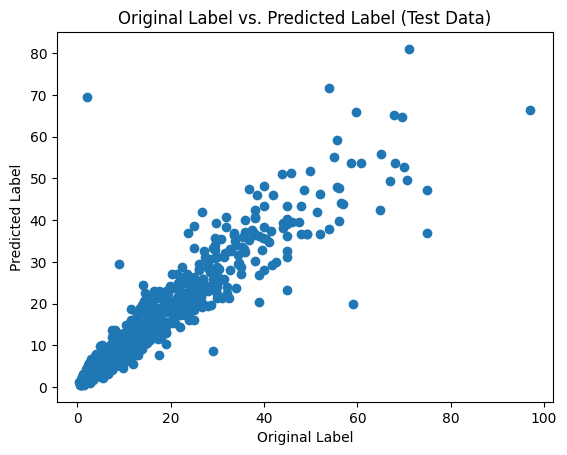

In [99]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(41,)), 
    tf.keras.layers.Dense(units=64, activation='relu'),                   
    tf.keras.layers.Dense(units=32, activation='relu'),                    
    tf.keras.layers.Dense(units=1, activation='linear')                     
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])  

model.fit(X_train, y_train, epochs=20, batch_size=12, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Loss: ",loss)
print("Mean Absolute Error (MAE):", mae)
arr=np.array(X_test[0])

expanded_arr = arr.reshape(1,41)
print("test: ", model.predict(expanded_arr))
print("real : ",y_test)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Original Label")
plt.ylabel("Predicted Label")
plt.title("Original Label vs. Predicted Label (Test Data)")
plt.show()
model.save('model.h5')